# Plotting a population pyramid in Python

Population pyramids are graphical representation of the age-sex structure of a country or an area. They help us observe what structure that particular population is, what structure it was in the past and how is it likely to change in the future.

For one of my recent project, I needed to plot one in Python. Let's do it here.

I will need the following libraires for this project

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First, we need some data. Let's use UK population estimates for 2020 from the Office of National Statistics.<br>
https://www.ons.gov.uk/census/2011census/2011censusdata/2011censusdatacatalogue

Let's import the data

In [33]:
uk = pd.read_csv('uk_population.csv')

This is what my input data should look like:

In [34]:
uk

,age,male,female
0,0_0,360100,341800
1,1_4,1581300,1499100
2,5_9,2126000,2021500
3,10_14,2073500,1971600
4,15_19,1893300,1790400
5,20_24,2132000,2001100
6,25_29,2280800,2195800
7,30_34,2263500,2258500
8,35_39,2179500,2224600
9,40_44,2032100,2059500


18 rows, one for each age range and one column for male and one for female. For a simple pyramid I can use counts. I could also convert the counts to percentages out of a total, but for now I will stick with counts.

In order to have one gender on the left and the other on the right, I need to multiply the counts for one of the genders by -1. I also want to reduce the numbers by 1,000 so that they are more readable, hence I will divide one by -1,000 and the other by 1,000.

In [35]:
uk['male'] = uk['male'] / -1000
uk['female'] = uk['female'] / 1000

Set up some paramteres for displaying the graph.

In [36]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

I also need to set up the order of the age ranges to use (so that the younger show at the bottom and the older at the top), this will then be given as one of the arguments to my plotting function.

In [37]:
ages = ['85_', '80_84', '75_79', '70_74', '65_69', '60_64', '55_59', '50_54',
            '45_49', '40_44', '35_39', '30_34', '25_29', '20_24', '15_19', 
            '10_14', '5_9', '0_4']

Finally, plot the graph.

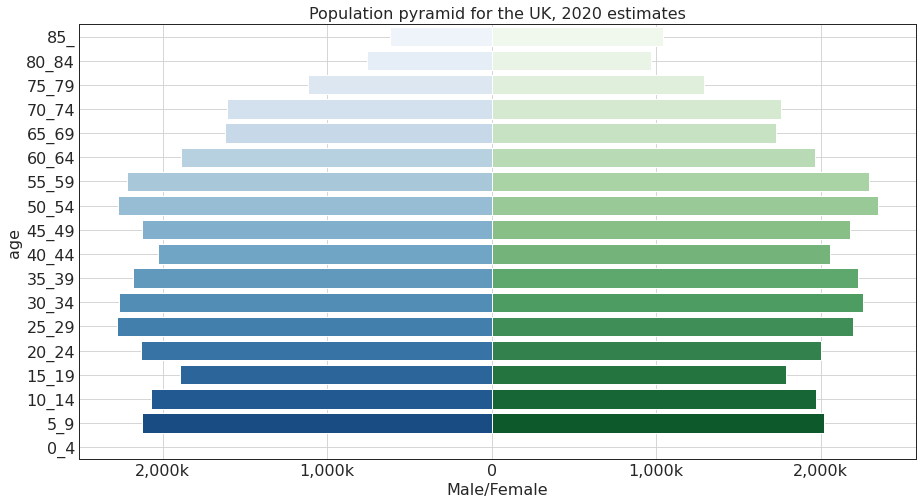

In [40]:
plt.rcParams["figure.figsize"] = (15, 8)

ax1 = sns.barplot(x='male', y='age', data=uk, order=ages, palette="Blues")
ax2 = sns.barplot(x='female', y='age', data=uk, order=ages, palette="Greens")
plt.title("Population pyramid for the UK, 2020 estimates")
plt.xticks(ticks=[-2000, -1000, 0, 1000, 2000],
           labels=['2,000k', '1,000k', '0', '1,000k', '2,000k'])

plt.grid()
plt.xlabel("Male/Female")
plt.savefig('population_pyramid.png')

The plot requires two barplot objects, one for male and one for female. As male counts have been converted to negative, they show on the left side on the graph. In order for the x axis label to show positive values, I needed to overide the xticks to the values I wanted.

That's it. I now have a simple population pyramid.

Thanks for reading. You can find the code for this as well as the dataset used on my GitHub account.<br>
https://github.com/maciejtarsa/medium-articles/tree/main/population_pyramid